In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
df = pd.read_csv('/Users/zhariko_ov/Desktop/VsCode/Data Science with Python (FreeCodeCamp)/Projects/data/epa-sea-level.csv')
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


##About data

What is CSIRO stand for?
- Commonwealth Scientific and Industrial Research Organisation

What's NOAA stand for?
- National Oceanic and Atmospheric Administration

##Sea Level Predictor

<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

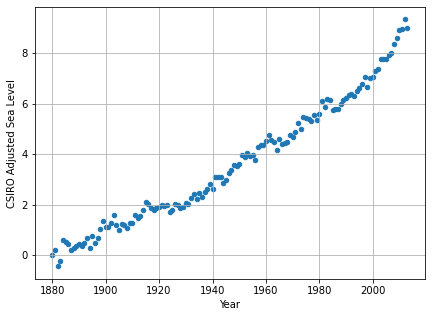

In [3]:
# Create scatter plot of CSIRO Adjusted Sea Level per years

df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', figsize=(7,5), grid=True)

In [4]:
# Get the slope and y-intercept of the line of best fit

res = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
res

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.9847571311825853, pvalue=3.788696979107662e-102, stderr=0.000969211871328706, intercept_stderr=1.886943381242505)

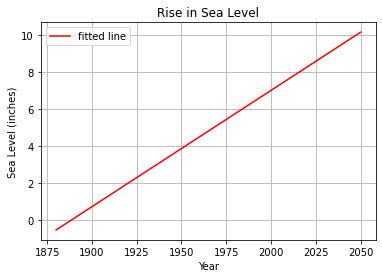

In [5]:
# Plot the line of best fit from 1875 to 2050
future = np.arange(1880,2051)      
plot_1 = plt.plot(future, res.intercept + res.slope*future, 'r', label='fitted line')
plt.title('Rise in Sea Level')
plt.ylabel('Sea Level (inches)')
plt.xlabel('Year')
plt.legend()
plt.grid()

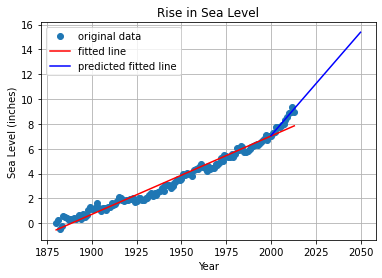

In [6]:
# Plot a new best fit line using the data from 2000 to the most recent year in the data set.
# Connect it to the last graph

df_from_2000 = df[(df['Year'] >= 2000)]
res_from_2000 = linregress(x=df_from_2000['Year'], y=df_from_2000['CSIRO Adjusted Sea Level'])

future = np.arange(2000,2051)
plt.plot(df.Year, df['CSIRO Adjusted Sea Level'], 'o', label='original data')
plt.plot(df.Year, res.intercept + res.slope*df.Year, 'r', label='fitted line')
plt.plot(future, res_from_2000.intercept + res_from_2000.slope*future, 'b', label='predicted fitted line')
plt.title('Rise in Sea Level')
plt.ylabel('Sea Level (inches)')
plt.xlabel('Year')
plt.legend()
plt.grid()